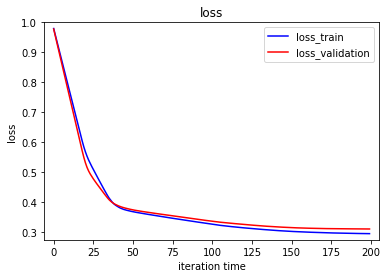

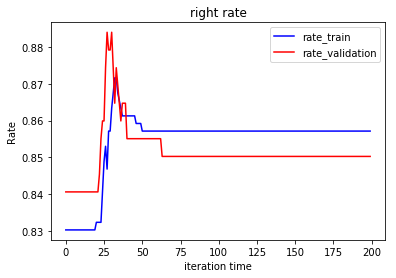

In [1]:
#实验名称：线性分类和梯度下降
#实验日期：2017/12/2
#实验目的：理解线性回归和梯度下降的原理

import os 
os.chdir('E://dataset')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

#从数据集中读取数据，并使用train_test_split函数切分数据集，获得训练集和验证集
X, y = load_svmlight_file('australian_scale.txt')
X = X.toarray()
X = np.c_[X, np.ones((X.shape[0],1))]
y = y.reshape(y.shape[0], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#对模型参数进行初始化，W为全0初始化,步长设为0.001,LAMBDA设为1,迭代次数设为200次,阈值为0
W = np.zeros((X.shape[1],1))
eta = 0.00005
LAMBDA = 1
iterTime = 200
C=1
threshold = 0

#使用list来记录每次迭代后的loss和预测正确率,loss_train_list记录训练集的loss，loss_validation记录验证集的loss
#right_rate_train_list记录训练集的预测正确率,right_rate_validation_list记录验证集的预测正确率
loss_train_list = []
right_rate_train_list= []
loss_validation_list = []
right_rate_validation_list = []

#计算hingeLoss
def calHingeLoss(Yi,Xi,W):
    if (1 - Yi * np.dot(W.T, Xi.T)[0][0]) > 0:
        hingeLoss = 1 - Yi * np.dot(W.T, Xi.T)[0][0]
    else:
        hingeLoss = 0
    return hingeLoss

#计算梯度函数
def calGradient(X_train, y_train, W):
    temp = np.zeros(W.shape)
    for index in range(X_train.shape[0]):
        Yi = y_train[index][0]
        Xi = X_train[index].reshape(1,X.shape[1])
        hingeLoss = calHingeLoss(Yi, Xi, W)
        if hingeLoss > 0:   
            temp = temp + Yi * Xi.T
        else:
            temp = temp + np.zeros(W.shape)
    gradient = W - C * temp
    return gradient

#计算损失值函数
def calLoss(W, X_t, y_t):
    temp=0
    for index in range(y_t.shape[0]):
        Yi = y_t[index][0]
        Xi = X_t[index].reshape(1,X_t.shape[1])
        temp += calHingeLoss(Yi, Xi, W)
    temp = C * temp 
    loss = 1/2 * np.dot(W.T,W) + temp
    loss = loss /float(y_t.shape[0])
    return loss

#迭代过程，迭代次数为iterTime=200次
for i in range(iterTime):
    gradient = calGradient(X_train, y_train, W)
    W = W - eta*gradient                        #每次迭代对W进行一次更新
  
    Ltrain = calLoss(W, X_train, y_train)       #计算训练集的loss
    loss_train_list.append(Ltrain[0][0])        #将训练集的loss记录在loss_train_list中
    
    Ltest = calLoss(W, X_test, y_test)          #计算验证集的loss
    loss_validation_list.append(Ltest[0][0])    #将验证集的loss记录在loss_validation_list中
    
    right = 0                                   #记录正确预测的样本数
    for index in range(len(X_train)):
        Ypredict= np.dot(X_train[index], W)
        if Ypredict > 0:
            Ypredict = 1
        else:
            Ypredict = -1
        if Ypredict == y_train[index][0]:
            right += 1
        rightRate=right/float(y_train.shape[0])
    right_rate_train_list.append(rightRate)     #将训练集的rightRate记录在right_rate_train_list中
   
    right = 0                                   #记录正确预测的样本数
    for index in range(len(X_test)):
        Ypredict= np.dot(X_test[index], W)
        if Ypredict > 0:
            Ypredict = 1
        else:
            Ypredict = -1
        if Ypredict == y_test[index][0]:
            right += 1
        rightRate=right/float((y_test.shape[0])) 
    right_rate_validation_list.append(rightRate) #将验证集的rightRate记录在right_rate_validation_list中
    
#使用matplotlib来画出Ltrain和LValidation以及rightRate随迭代次数变化的图像
plt.xlabel('iteration time')
plt.ylabel('loss')
plt.title('loss')
x=range(len(loss_train_list))
plt.plot(x, loss_train_list,color='blue',label="loss_train")
x=range(len(loss_validation_list))
plt.plot(x, loss_validation_list,color='red',label='loss_validation')
plt.legend(loc='upper right')
plt.margins(0.03)
plt.show()

plt.xlabel('iteration time')
plt.ylabel('Rate')
plt.title('right rate')
x=range(len(right_rate_train_list))
plt.plot(x,right_rate_train_list,'b-',label="rate_train")
x=range(len(right_rate_validation_list))
plt.plot(x,right_rate_validation_list,'r-',label="rate_validation")
plt.legend(loc='upper right')
plt.show()